<a href="https://colab.research.google.com/github/satabdim10/GRIP-TSF-July2021-Tasks/blob/main/fifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis - FIFA 

> Author: SATABDI MISHRA

> Date: 18/06/2021

> Dataset: https://drive.google.com/drive/folders/14UTen8mt7VEJVlvED4UL6tSZlqCXx5BL?usp=sharing

# LOAD THE DATA

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
fifa = pd.read_csv("fifa.csv")

fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


# Data Summary

In [ ]:
#Check data info
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [ ]:
# Check data types
fifa.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Skill Moves                 float64
Position                     object
Joined                        int64
Contract Valid Until         object
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object

In [ ]:
#Check for duplicates
fifa.duplicated().sum()

0

In [ ]:
#Check for null
fifa.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [ ]:
#Check nationality count where club is null

fifa[fifa.Club.isnull()==True]['Nationality'].value_counts()

India             30
Bolivia           24
Bulgaria          20
Paraguay          19
Hungary           16
South Africa      16
Romania           13
Ecuador           12
Egypt             11
New Zealand       10
Russia            10
Iceland            9
Ivory Coast        9
Peru               7
Venezuela          7
Slovenia           5
Canada             5
Uruguay            3
Finland            2
Cameroon           2
Sweden             2
Greece             2
Australia          2
Portugal           1
Argentina          1
Wales              1
Czech Republic     1
Poland             1
Name: Nationality, dtype: int64

In [ ]:
#Impute Null with 0 for numeric variable, 'NA' for categorical variable

fifa['Club'] = fifa['Club'].fillna('NA')
fifa.fillna(0,inplace=True)

fifa[fifa.Club == 'NA']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
452,207439,L. Paredes,24,Argentina,80,85,NA,0.0,0.0,Right,2.0,4.0,CM,2016,0,5.916667,165.0,4585.060806
538,156713,A. Granqvist,33,Sweden,80,80,NA,0.0,0.0,Right,2.0,2.0,LCB,2016,0,6.333333,185.0,4585.060806
568,229909,A. Lunev,26,Russia,79,81,NA,0.0,0.0,Right,1.0,1.0,GK,2016,0,6.166667,176.0,4585.060806
677,187347,I. Smolnikov,29,Russia,79,79,NA,0.0,0.0,Right,2.0,3.0,RB,2016,0,5.833333,154.0,4585.060806
874,187607,A. Dzyuba,29,Russia,78,78,NA,0.0,0.0,Right,2.0,3.0,ST,2016,0,6.416667,201.0,4585.060806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,245164,V. Kaith,21,India,55,64,NA,0.0,0.0,Right,1.0,1.0,GK,2016,0,6.166667,176.0,4585.060806
17215,243131,K. Taimi,26,Finland,55,57,NA,0.0,0.0,Right,1.0,2.0,RB,2016,0,6.333333,187.0,4585.060806
17339,233526,S. Passi,23,India,54,63,NA,0.0,0.0,Right,1.0,2.0,RM,2016,0,5.750000,143.0,4585.060806
17436,236452,D. Lalhlimpuia,20,India,54,67,NA,0.0,0.0,Right,1.0,2.0,GK,2016,0,6.000000,168.0,4585.060806


In [ ]:
#Drop Irrelevant columns
fifa.drop(columns=['ID' , 'Contract Valid Until', 'Joined'], inplace = True)

In [ ]:
#Get unique count of all the columns

fifa.nunique()

Name                        17194
Age                            29
Nationality                   164
Overall                        48
Potential                      47
Club                          652
Value                         217
Wage                          144
Preferred Foot                  2
International Reputation        6
Skill Moves                     6
Position                       27
Height                         22
Weight                         58
Release Clause               1245
dtype: int64

In [ ]:
# Get top 20 national teams with highest number of players

fifa.Nationality.value_counts()[:20]

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
United States           353
Poland                  350
Norway                  341
Saudi Arabia            340
Denmark                 336
Name: Nationality, dtype: int64

In [ ]:
# Get value_counts of clubs

fifa[fifa.Club!='NA'].Club.value_counts()


Empoli                       33
Southampton                  33
Tottenham Hotspur            33
Chelsea                      33
FC Barcelona                 33
                             ..
Tromsø IL                    20
América FC (Minas Gerais)    20
Limerick FC                  19
Sligo Rovers                 19
Derry City                   18
Name: Club, Length: 651, dtype: int64

In [ ]:
# Get descriptive statistics

fifa.describe()

,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299,2410.695886,9.731312,1.110287,2.355083,5.946771,165.979129,4585.060971
std,4.669943,6.908930,6.136496,5594.932671,21.999290,0.397630,0.764813,0.220514,15.572775,10630.414430
min,16.000000,46.000000,48.000000,0.000000,0.000000,0.000000,0.000000,5.083333,110.000000,13.000000
25%,21.000000,62.000000,67.000000,300.000000,1.000000,1.000000,2.000000,5.750000,154.000000,570.000000
50%,25.000000,66.000000,71.000000,675.000000,3.000000,1.000000,2.000000,5.916667,165.000000,1300.000000
75%,28.000000,71.000000,75.000000,2000.000000,9.000000,1.000000,3.000000,6.083333,176.000000,4585.060806
max,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,6.750000,243.000000,228100.000000


# Data Visualization

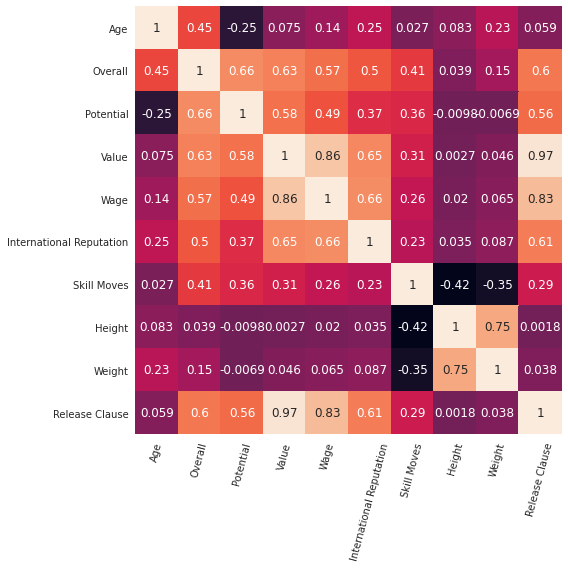

In [ ]:
# Get correlation matrix plot

plt.figure(figsize=(8,8))
sns.heatmap(fifa.corr(), annot=True, cbar=False, annot_kws={'size':12})

plt.xticks(rotation = 75)
plt.tight_layout()
plt.show()


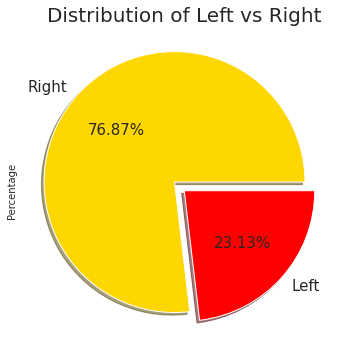

In [ ]:
# Distribution of left foot vs right foot player

colors = ['gold','red']

left_vs_right = pd.DataFrame({'Right':fifa.Name[fifa['Preferred Foot'] == 'Right'].count(), 
                        'Left':fifa.Name[fifa['Preferred Foot'] == 'Left'].count()}, 
                       index={'Count'}).T

plt.title('Distribution of Left vs Right', fontsize=20)
left_vs_right.Count.plot.pie(autopct='%1.2f%%',figsize=(6,6), label='Percentage', colors = colors, 
                       textprops = {"fontsize":15}, shadow=True, explode=(0.1,0))
plt.show()



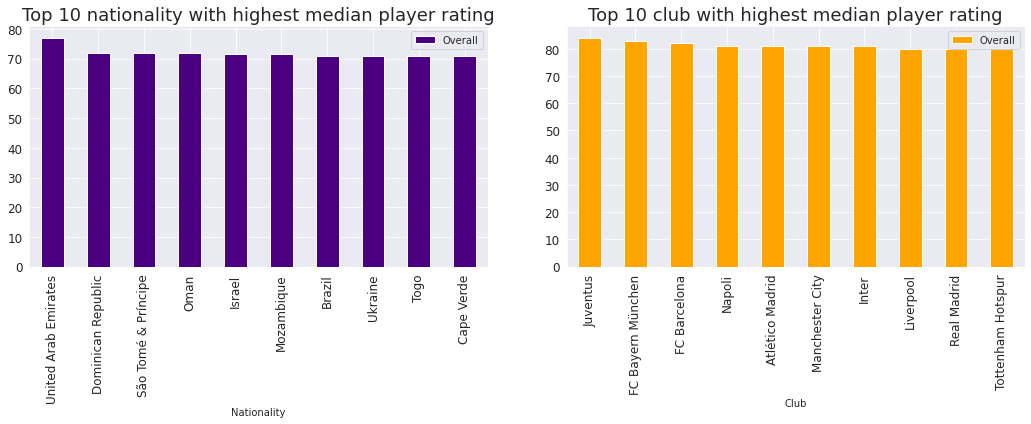

In [ ]:
#Plot top 10 National teams based on mean Overall 

df1 = fifa[['Nationality','Overall']].groupby(['Nationality']).median().sort_values('Overall',ascending = False)[:10]

color= ['indigo']
fig,ax = plt.subplots(1,2, figsize=(15,6))

ax[0].set_alpha(0.8)
ax[0].set_title("Top 10 nationality with highest median player rating", fontsize=18)
df1.plot(kind='bar', color=color, fontsize=12, ax=ax[0]);

#Plot top 10 Clubs based on mean Overall 
color = 'orange'
df2 = fifa[['Club','Overall']].groupby(['Club']).median().sort_values('Overall',ascending = False)[:10]

ax[1].set_alpha(0.8)
ax[1].set_title("Top 10 club with highest median player rating", fontsize=18)
df2.plot(kind='bar', color=color, fontsize=12, ax=ax[1])

plt.tight_layout()
plt.show()


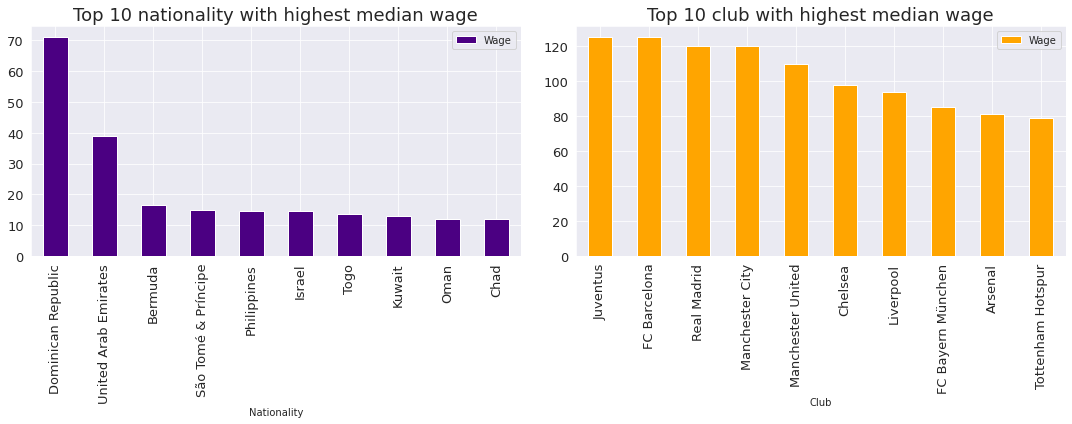

In [ ]:
#Plot top 10 National teams based on median Wage 

df1 = fifa[['Nationality','Wage']].groupby(['Nationality']).median().sort_values('Wage',ascending = False)[:10]

color= ['indigo']
fig,ax = plt.subplots(1,2, figsize=(15,6))

ax[0].set_alpha(0.8)
ax[0].set_title("Top 10 nationality with highest median wage", fontsize=18)
df1.plot(kind='bar', color=color, fontsize=13, ax=ax[0]);

#Plot top 10 Clubs based on median Wage 
color = 'orange'

df2 = fifa[['Club','Wage']].groupby(['Club']).median().sort_values('Wage',ascending = False)[:10]

ax[1].set_alpha(0.8)
ax[1].set_title("Top 10 club with highest median wage", fontsize=18)
df2.plot(kind='bar', color=color, fontsize=13, ax=ax[1])

plt.tight_layout()
plt.show()


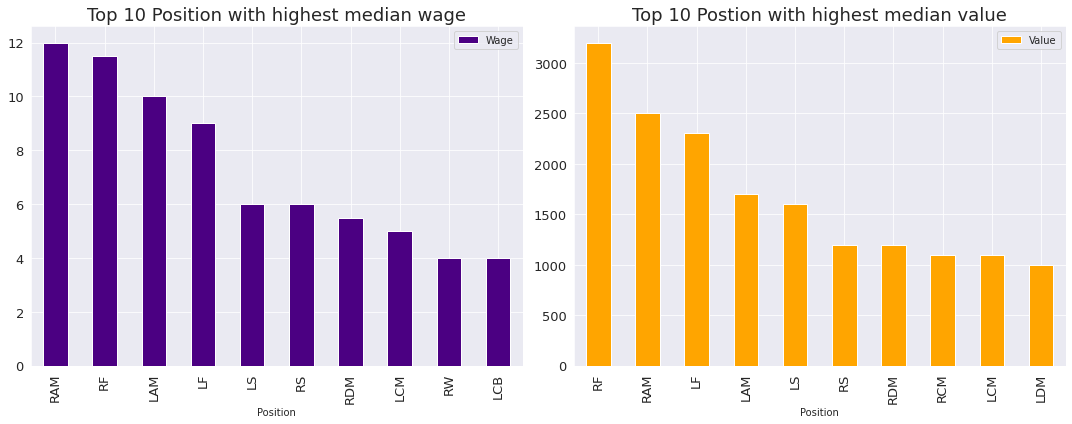

In [ ]:
# Top 10 Positions with the highest Wage & Value

df1 = fifa[['Position','Wage']].groupby(['Position']).median().sort_values('Wage',ascending = False)[:10]

color= ['indigo']
fig,ax = plt.subplots(1,2, figsize=(15,6))

ax[0].set_alpha(0.8)
ax[0].set_title("Top 10 Position with highest median wage", fontsize=18)
df1.plot(kind='bar', color=color, fontsize=13, ax=ax[0]);

#Plot top 10 Clubs based on median Wage 
color = 'orange'

df2 = fifa[['Position','Value']].groupby(['Position']).median().sort_values('Value',ascending = False)[:10]

ax[1].set_alpha(0.8)
ax[1].set_title("Top 10 Postion with highest median value", fontsize=18)
df2.plot(kind='bar', color=color, fontsize=13, ax=ax[1])

plt.tight_layout()
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


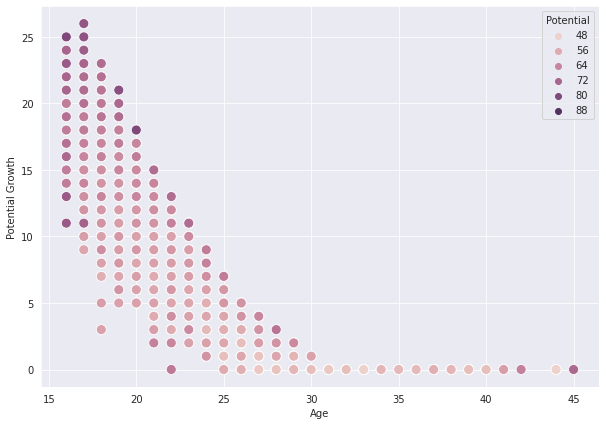

In [ ]:
# Plotting age vs potential growth (Potential - Current Rating)

plt.figure(figsize=(10,7))
sns.scatterplot(fifa.Age, fifa.Potential - fifa.Overall, hue=fifa.Potential, s=100)
plt.ylabel('Potential Growth')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


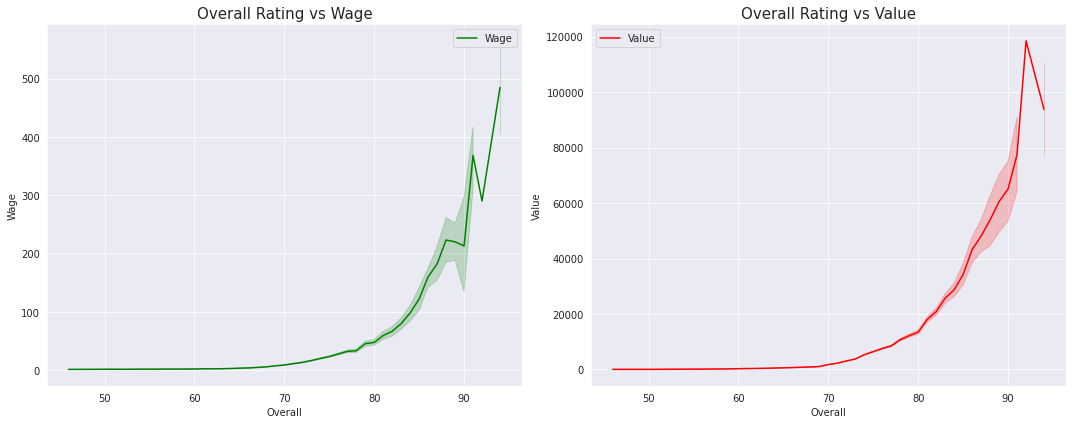

In [ ]:
# Analysis on Overall vs Wage & Value
fig, ax = plt.subplots(1,2, figsize=(15,6))
ax[0].set_title('Overall Rating vs Wage', fontsize=15)
ax[1].set_title('Overall Rating vs Value', fontsize=15)

sns.lineplot(fifa.Overall, fifa.Wage, color='green', label='Wage', ax=ax[0])
sns.lineplot(fifa.Overall, fifa.Value, color='red', label='Value', ax=ax[1])

plt.tight_layout()
plt.show()


## KEY FINDINGS:

> 1. Potential decreases with increase in age.
> 2. Skill moves decreases with increase in weight.
> 3. International reputation increases with increase in age.
> 4. Juventus & Barcelona have high median wage because of Ronaldo and Messi. 
> 5. Players below 25 have the maximum potential growth, 25-30 have limited growth opportunity, and growth becomes stagnant after 30. 
> 6. Attacking position such as forward or attacking mid have highest wage and value.